In [1]:
import pandas as pd
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint as rn
import numpy as np
import random

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df_active = df.loc[df['Дата'] == datetime(2018, 4, 17)].copy()

In [4]:
df_active['Час'].dtype

dtype('O')

In [5]:
df_active

,Дата,Час,Глобальне освітлення,пряме освітлення,дифузійне освітдення
0,2018-04-17,05:24:00,7.0,0.0,7.0
1,2018-04-17,05:25:00,8.0,0.0,8.0
2,2018-04-17,05:26:00,8.0,0.0,8.0
3,2018-04-17,05:27:00,9.0,0.0,9.0
4,2018-04-17,05:28:00,10.0,0.0,10.0
...,...,...,...,...,...
1111,2018-04-17,23:55:00,0.0,0.0,0.0
1112,2018-04-17,23:56:00,0.0,0.0,0.0
1113,2018-04-17,23:57:00,0.0,0.0,0.0
1114,2018-04-17,23:58:00,0.0,0.0,0.0


In [6]:
date = str(datetime.strptime('2018-04-17', '%Y-%m-%d').date())
df_active['t1'] = pd.to_datetime(date + " " + df_active['Час'].astype(str))
df_active['t_delta'] = df_active['t1'] - df_active.at[0, 't1']
df_active['t_delta_2'] = df_active['t_delta'].dt.seconds / 60
df_active = df_active[['t_delta_2', 'Глобальне освітлення']].copy()
df_active.rename(columns={'t_delta_2': 'Time', 'Глобальне освітлення': 'Value'}, inplace=True)
df_active.head(3)

,Time,Value
0,0.0,7.0
1,1.0,8.0
2,2.0,8.0


In [7]:
print('Кількість значень складає {}'.format(len(df_active)))

Кількість значень складає 1116


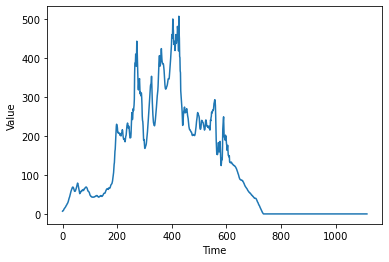

In [8]:
fig, ax = plt.subplots()
sns.lineplot(data=df_active, x='Time', y='Value', ax=ax)
plt.show()

In [9]:
df_active = df_active.loc[df_active.Value > 0]
print('Кількість значень скоротилася до {}'.format(len(df_active)))

Кількість значень скоротилася до 736


Скоротимо кількість значень до 100 таким чином, щоб інтервали між значеннями були різними. У порівнянні з поточним датасетом, де інтервали між точками рівні, це дасть певне узагальнення задачі. Завданням умови в циклі _while_ можна змінювати кількість значень, що залишаються для подальшої роботи.

In [10]:
to_del = []
while len(set(to_del)) < 636:
    to_del.append(random.randint(0, len(df_active)))
to_del = list(set(to_del))
new_index = [i for i in range(len(df_active)) if i not in to_del]
df_active = df_active.loc[df_active.index.isin(new_index)].copy()

In [13]:
df_active.head(10)

,Time,Value
1,1.0,8.0
2,2.0,8.0
3,3.0,9.0
10,10.0,17.0
13,13.0,21.0
14,14.0,22.0
15,15.0,23.0
16,16.0,24.0
73,73.0,61.0
79,79.0,64.0


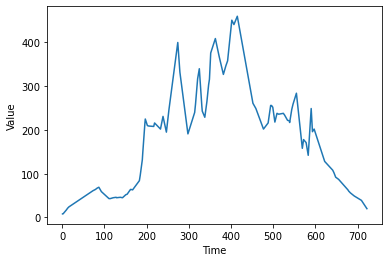

In [11]:
fig, ax = plt.subplots()
sns.lineplot(data=df_active, x='Time', y='Value', ax=ax)
plt.show()

Як можна бачити, крива дещо спрощена, але не втратила форми. Збережемо поточний датафрейм в бінарний файл _pickle_ для подальшої роботи в інших екземплярах _Jupiter Notebook_.

In [12]:
df_active.to_pickle('data.pickle')